In [1]:
import numpy as np  
import pandas as pd 

# Предварительная обработка

In [106]:
# подгружаем датасет
df = pd.read_csv(path + '/parsed_cars.csv')
df = df.drop(['Unnamed: 0', 'index', 'Unnamed: 0.1'], axis = 1) # убираем ненужные столбцы

df.head()

,Название,Ссылка,Цена,Год,Километраж,Город,Класс автомобиля,Количество дверей,Количество мест,Длина,Ширина,Высота,Коробка передач,Тип привода,Максимальная скорость,Разгон до 100,Тип двигателя,Максимальная мощность
0,BYD E2,https://auto.ru/cars/used/sale/byd/e2/11231094...,2450000₽,2023.0,1.0,moskva,C,5.0,5,4260.0,1760.0,1530.0,Автомат,передний,130.0,NaN,Электро,95 л.с. (70 кВт)
1,Changan UNI-K,https://auto.ru/cars/used/sale/changan/uni_k/1...,3440000₽,2023.0,1.0,moskva,E,5.0,5,4865.0,1948.0,1695.0,Автомат,полный,200.0,NaN,бензиновый,226 л.с. (166 кВт) при 5500
2,LiXiang L9 44.5 kWh,https://auto.ru/cars/used/sale/lixiang/l9/1122...,7760000₽,2024.0,1.0,moskva,F,5.0,6,5218.0,1998.0,1800.0,Автомат,полный,180.0,5.3,гибридный,449 л.с. (330 кВт)
3,NaN,https://auto.ru/cars/used/sale/geely/monjaro/1...,NaN,NaN,NaN,moskva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Zeekr 007 770,https://auto.ru/cars/used/sale/zeekr/007/11229...,5830000₽,2024.0,1.0,moskva,D,4.0,5,4865.0,1900.0,1450.0,Автомат,полный,210.0,3.5,Электро,646 л.с. (475 кВт)


In [107]:
df.columns # наши полученные переменные

Index(['Название', 'Ссылка', 'Цена', 'Год', 'Километраж', 'Город',
       'Класс автомобиля', 'Количество дверей', 'Количество мест', 'Длина',
       'Ширина', 'Высота', 'Коробка передач', 'Тип привода',
       'Максимальная скорость', 'Разгон до 100', 'Тип двигателя',
       'Максимальная мощность'],
      dtype='object')

### Описание переменных
1. **Название**: Название марки автомобиля и ее модели
2. **Ссылка**: Ссылка на объявления на сайте auto.ru
3. **Цена**: Целевая переменная, которую мы потом будем предсказывать. Содержит информацию о цене машины в рублях
4. **Год**: Описывает год выпуска автомобиля
5. **Километраж**: Расстояние, которое машина проехала в тыс. км
6. **Город**: Город, в котором было размещено объявление. Были собраны объявления из 6 городов: Москва, Ростов-на-Дону, Санкт-Петербург, Екатеринбург, Новосибирск, Владивосток
7. **Класс автомобиля**: Всего представлено 8 классов машин, информация о классах есть [тут](https://www.autonews.ru/news/627e0cad9a79476cc13b0bef)
8. **Количество дверей**: Показывает, сколько дверей в машине. В нашем случае либо 4, либо 5
9. **Количество мест**: Показывает сколько людей машина может вместить
10. **Длина, ширина, высота**: Содержит информацию о размерах машины в миллиметрах
11. **Коробка передач**: Тип коробки передач машины. Всего есть 4 типа: автомат, робот, вариатор, механика
12. **Тип привода**: Информация о приводе автомобиля (передний, полный или задний)
13. **Максимальная скорость**: Максимальная скорость, до которой может разогнаться автомобиль в км/ч
14. **Разгон до 100**: Время в секундах, за которое машина разгоняется до 100 км/ч
15. **Тип двигателя**: Показывает тип двигателя автомобиля: бензиновый, дизельный, электро или гибридный
16. **Максимальная мощность**: Максимальная мощность двигателя машины в л.с.

В данных есть несколько проблем: надо убрать пустые строки, достать значения цен и мощности двигателя в формате int, а также убрать наблюдения с неизвестной ценой (их всего 2)

In [108]:
# убираем пустые строки
df = df[df.isna().sum(axis = 1) < 10] 

#убираем строки с неизвестной ценой, так как это целевая переменная
df = df[df['Цена'].isna() == False] 

#достаем значение макс. мощности из строки
df['Максимальная мощность'] = df['Максимальная мощность'].apply(lambda w: int(w.split('л.с.')[0].strip())) 

#убираем для цены символ рубля и делаем тип int
df['Цена'] = df['Цена'].str.replace('₽', '').astype(float) 

Посмотрим на значения в переменной "Количество мест". 

In [109]:
df['Количество мест'].value_counts()

5          2343
7           178
5, 7         86
6            75
4, 5         62
4            32
4, 7         22
6, 7         20
5, 6, 7      15
4, 6, 7      11
6, 4         10
6, 7, 8       2
5, 7, 9       1
2             1
Name: Количество мест, dtype: int64

Видим, что для некоторых моделей машин указывается несколько вариантов числа мест. Мы будем брать минимальную вместимость, так как для некоторых классов наблюдений слишком мало. Также придется закинуть единственную двухместную машину к четырехместным, ибо нет смысла держать в классе одно наблюдение.

In [110]:
def get_seats(value: str):
    if value == '2':
        return 4
    else:
        return min(list(map(int, value.split(', '))))
    
df['Количество мест'] = df['Количество мест'].apply(get_seats)

Похожая проблема есть с переменной Количество дверей, где только 2 двухдверные машины, поэтому их также отправим к четырехдверным.

In [123]:
def get_doors(value:int):
    if value == 2:
        return 4
    else:
        return value
df['Количество дверей'] = df['Количество дверей'].apply(get_doors)

Теперь посмотрим на пропуски в данных. Пропуски есть только в двух переменных: максимальная скорость и разгон до 100, мы постараемся их заполнить. Так как для автомобилей внутри одного класса эти показатели довольно близкие, мы заполним их средней по классу.

In [111]:
df.isna().sum()

Название                   0
Ссылка                     0
Цена                       0
Год                        0
Километраж                 0
Город                      0
Класс автомобиля           0
Количество дверей          0
Количество мест            0
Длина                      0
Ширина                     0
Высота                     0
Коробка передач            0
Тип привода                0
Максимальная скорость    187
Разгон до 100            675
Тип двигателя              0
Максимальная мощность      0
dtype: int64

In [112]:
df[df['Максимальная скорость'].isna()]['Класс автомобиля'].value_counts()

C    85
E    25
J    24
D    19
M    17
B    12
F     5
Name: Класс автомобиля, dtype: int64

In [113]:
pd.options.mode.chained_assignment = None # чтобы не вылезало предупреждение

for i in np.where(df['Максимальная скорость'].isna())[0]:
    df['Максимальная скорость'].iloc[i] = df[df['Класс автомобиля'] == 
                                    df['Класс автомобиля'].iloc[i]]['Максимальная скорость'].mean()
    
for i in np.where(df['Разгон до 100'].isna())[0]:
    df['Разгон до 100'].iloc[i] = df[df['Класс автомобиля'] == 
                                    df['Класс автомобиля'].iloc[i]]['Разгон до 100'].mean()

In [114]:
df.isna().sum()

Название                 0
Ссылка                   0
Цена                     0
Год                      0
Километраж               0
Город                    0
Класс автомобиля         0
Количество дверей        0
Количество мест          0
Длина                    0
Ширина                   0
Высота                   0
Коробка передач          0
Тип привода              0
Максимальная скорость    0
Разгон до 100            0
Тип двигателя            0
Максимальная мощность    0
dtype: int64

In [115]:
# также поменяем тип переменной год и количество дверей

df['Год'] = df['Год'].astype(int).astype(str)
df['Количество дверей'] = df['Количество дверей'].astype(int)

# Визуализация

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
# сохраняем категориальные признаки
var_cat = ['Год', 'Город', 'Класс автомобиля', 'Количество дверей',
           'Количество мест', 'Коробка передач', 'Тип привода', 'Тип двигателя']

# сохраняем непрерывные признаки
var_real = ['Километраж', 'Длина', 'Ширина',
           'Высота', 'Максимальная скорость', 'Разгон до 100', 'Максимальная мощность']
target = 'Цена'

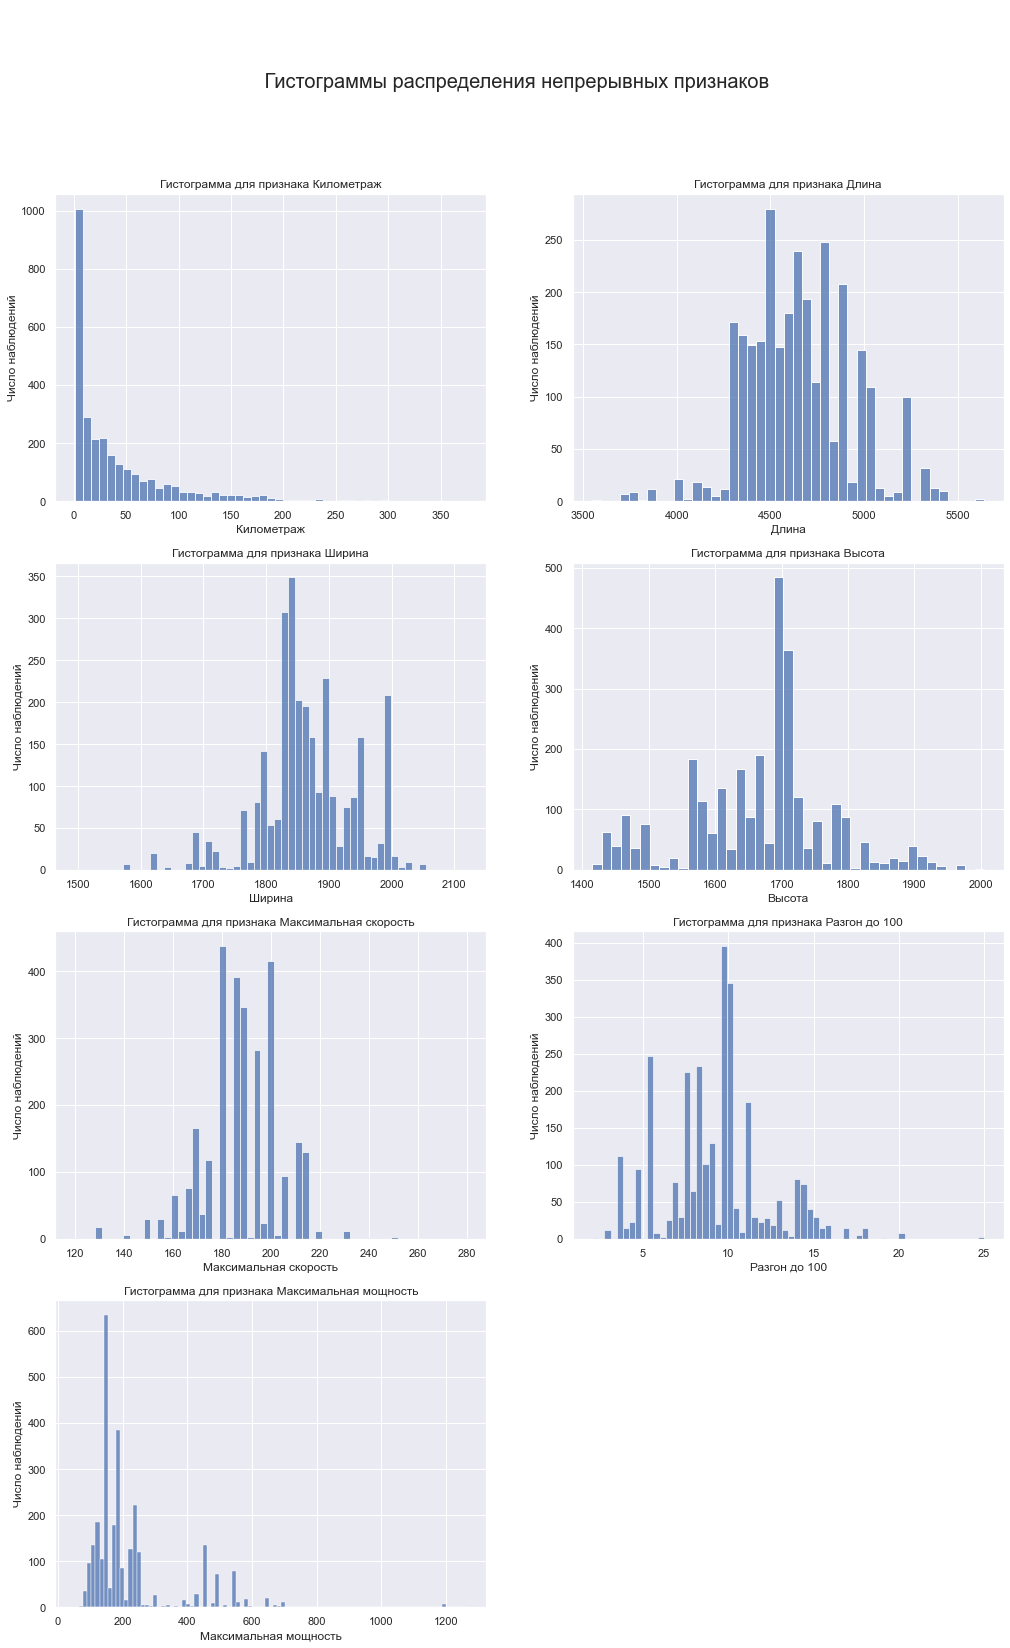

In [118]:
sns.set(font_scale = 1)
fig, axes = plt.subplots(4, 2, figsize=(17,26))


for i in range(len(var_real)):
    
    sns.histplot(x = df[var_real[i]], ax = axes[i // 2, i % 2]).set(
        
    title = 'Гистограмма для признака ' + var_real[i],
    xlabel = var_real[i],
    ylabel = 'Число наблюдений')

        
# тут скрываем ненужный пустой график на последней оси (так как графиков только 7)     
axes[3, 1].axis('off')

fig.suptitle('\n\n\n Гистограммы распределения непрерывных признаков', fontsize=20);

Из распределений непрерывных переменных можно сделать следующие выводы: 
- Распределение пробега автомобилей похоже на экспоненциальное, большинство машин из выборки практически новые
- Распределения длины ширины и высоты немного напоминают нормальное, для каждого показателя на графике выделяется мода. Для длины это что-то около 4500мм, для ширины это где-то 1820мм, а для высоты - 1700мм.
- Из распределения максимальной скорости видно, что большинство машин максимально разгоняется до 180-200 км/ч
- Разгон до 100 км/ч у машин разнообразный: есть много автомобилей, разгоняющихся за 5 секунд, 7-8 или 10 секунд
- Максимальная мощность двигателя у машина в основном колеблется от 150 до 250 л.с., но есть и машины у которых этот показатель значительно больше.

В целом у некоторых распределений можно заметить длинные хвосты, то есть в данных скорее всего есть выбросы, но они обусловлены тем, что у нас собрана информация по разным автомобилям и очевидно, что люксовые машины по некоторым показателям могут оказаться сильно лучше основной массы и наоборот.

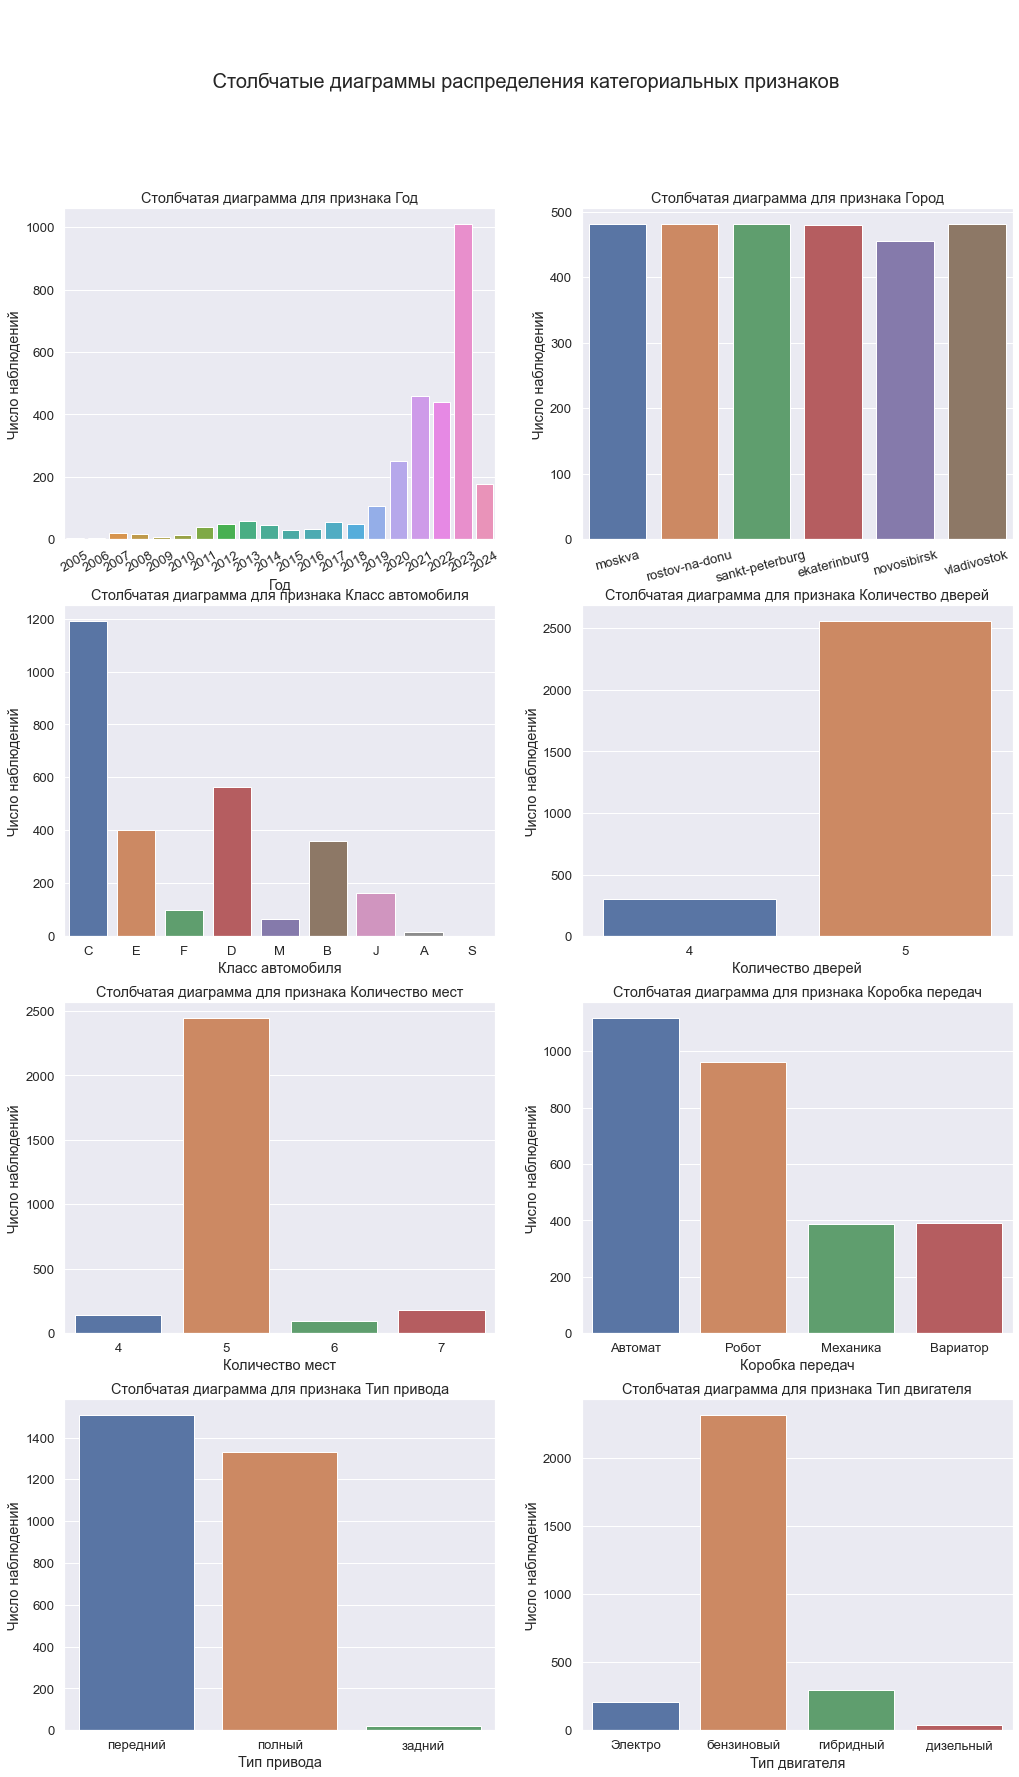

In [127]:
fig, axes = plt.subplots(4, 2, figsize=(17,28))
    
sns.countplot(x = sorted(df['Год']), ax = axes[0, 0]).set(
title = 'Столбчатая диаграмма для признака Год' ,
xlabel = 'Год',
ylabel = 'Число наблюдений')
axes[0,0].set_xticklabels(sorted(df['Год'].unique()), rotation = 30)

sns.countplot(x = df['Город'], ax = axes[0, 1]).set(
title = 'Столбчатая диаграмма для признака Город' ,
xlabel = '',
ylabel = 'Число наблюдений')
axes[0,1].set_xticklabels(df['Город'].unique() , rotation = 15)

sns.countplot(x = df['Класс автомобиля'], ax = axes[1, 0]).set(
title = 'Столбчатая диаграмма для признака Класс автомобиля' ,
xlabel = 'Класс автомобиля',
ylabel = 'Число наблюдений')

sns.countplot(x = df['Количество дверей'], ax = axes[1, 1]).set(
title = 'Столбчатая диаграмма для признака Количество дверей' ,
xlabel = 'Количество дверей',
ylabel = 'Число наблюдений')

sns.countplot(x = df['Количество мест'], ax = axes[2, 0]).set(
title = 'Столбчатая диаграмма для признака Количество мест' ,
xlabel = 'Количество мест',
ylabel = 'Число наблюдений')

sns.countplot(x = df['Коробка передач'], ax = axes[2, 1]).set(
title = 'Столбчатая диаграмма для признака Коробка передач' ,
xlabel = 'Коробка передач',
ylabel = 'Число наблюдений')

sns.countplot(x = df['Тип привода'], ax = axes[3, 0]).set(
title = 'Столбчатая диаграмма для признака Тип привода' ,
xlabel = 'Тип привода',
ylabel = 'Число наблюдений')

sns.countplot(x = df['Тип двигателя'], ax = axes[3, 1]).set(
title = 'Столбчатая диаграмма для признака Тип двигателя' ,
xlabel = 'Тип двигателя',
ylabel = 'Число наблюдений')




fig.suptitle('\n\n\n Столбчатые диаграммы распределения категориальных признаков', fontsize=20);

Из построенных визуализаций для категориальных переменных можно понять какие категории в различных классах наиболее популярные. В целом здесь нет ничего, что бросается в глаза: классических пятиместных машин больше чем остальных, бензиновый двигатель самый популярный среди автомобилей, и т.д.

Единственное, что здесь можно отметить, это то, что довольно мало заднеприводных автомобилей, а также, что большинство машин в данных было выпущено за последние 4-5 лет.

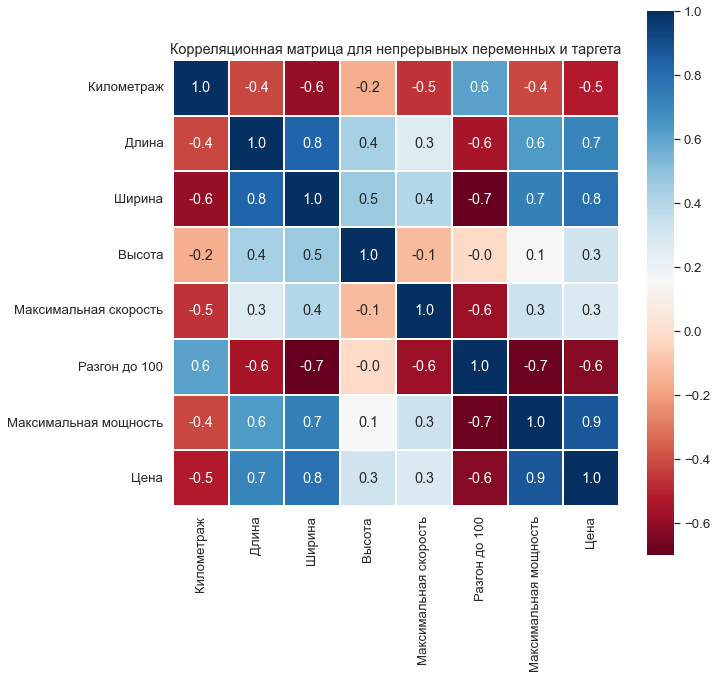

In [120]:
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)

sns.heatmap(df[var_real + [target]].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu").set(
            title = 'Корреляционная матрица для непрерывных переменных и таргета');

Из корреляционной матрицы видно, что наименьшая корреляция среди непрерывных признаков с таргетом - 0.3. Это значит, что все признаки так или иначе влияют на цену, а значит прогнозирование должно получиться хорошо. Наибольшую корреляцию с ценой показывает максимальная мощность двигателя (0.9), что неудевительно. Намного больше удивляет сильная корреляция между шириной и ценой, и длиной и ценой (0.8 и 0.7). Также довольно логично, что разгон до 100 и пробег отрицательно влияют на цену.

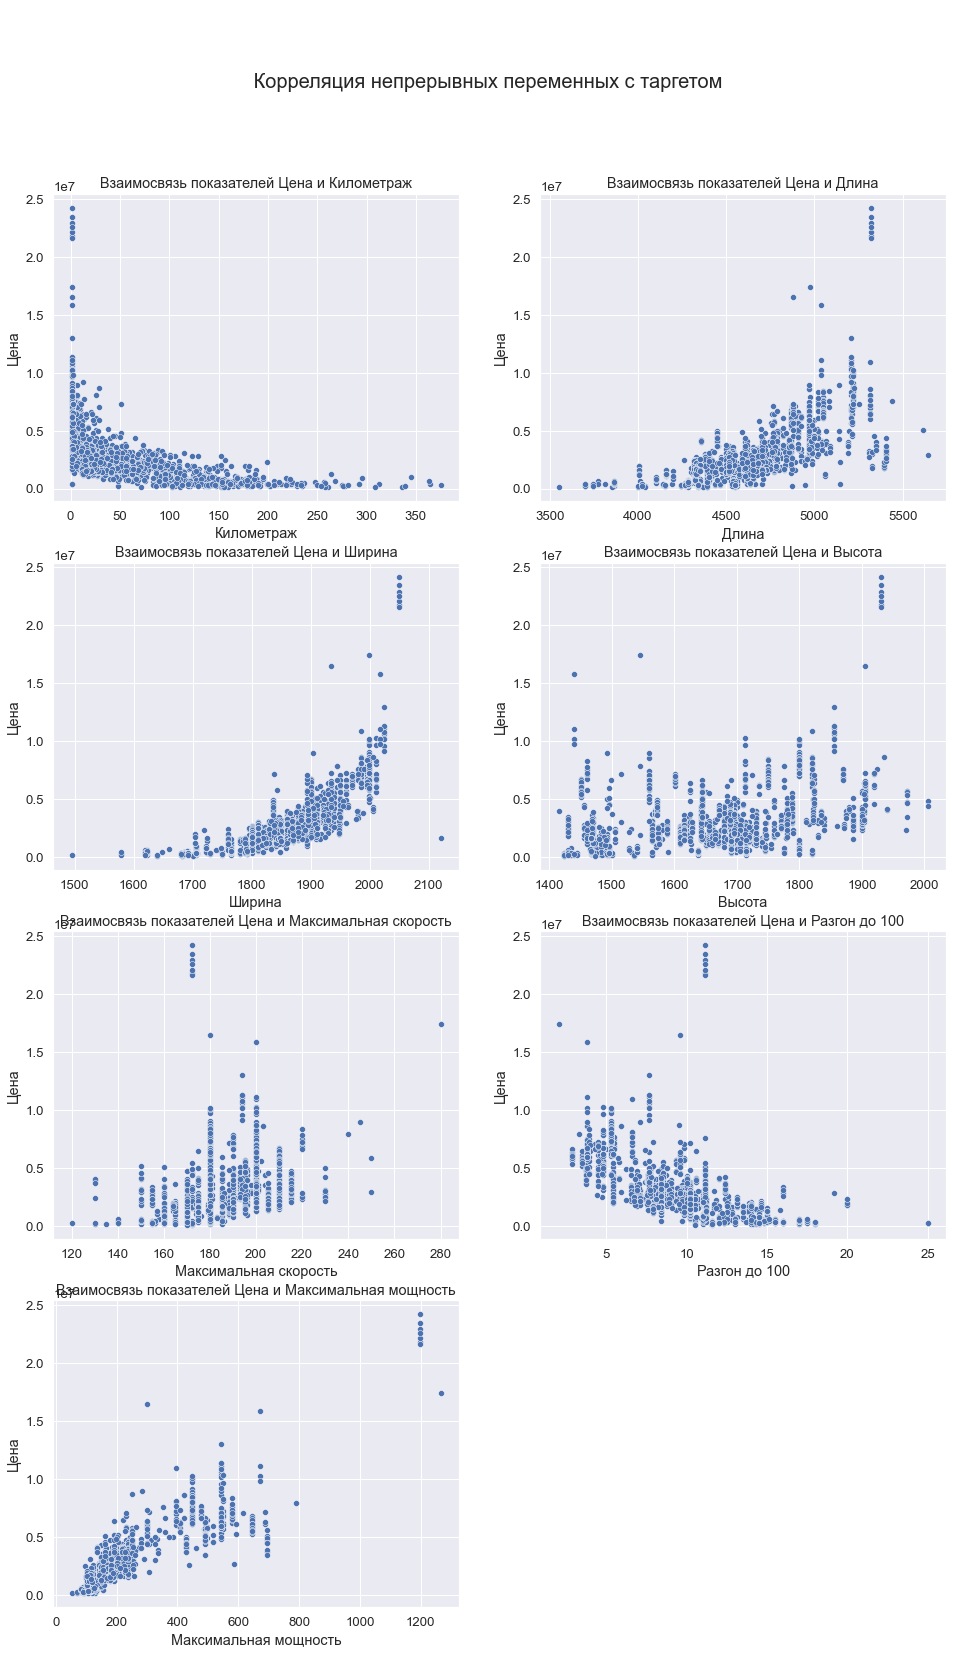

In [121]:
fig, axes = plt.subplots(4, 2, figsize=(16,26))


for i in range(len(var_real)):
    sns.scatterplot(x = var_real[i], y = target, data = df, ax = axes[i // 2, i % 2]).set(
        title = 'Взаимосвязь показателей Цена и ' + (var_real)[i])
    
axes[3, 1].axis('off')
    
fig.suptitle('\n\n\n Корреляция непрерывных переменных с таргетом', fontsize=20);

Для многих облаков рассеивания можно заметить что-то похожее на квадратичную связь (например, для ширины и разгона до 100). При обучении модели можно будет добавить квадраты этих переменных в признаки. В остальном, в принципе, все как и в корреляционной матрице.

Для понимания цен на рынке, стоит посчитать среднюю цену автомобилей по их классам. Исходя из этой информации будет понятна разница между различными классами машин и насколько эта разница критична

In [128]:
df_class_price = df.groupby('Класс автомобиля')['Цена'].mean().astype(int)
df_class_price

Класс автомобиля
A     304705
B    1620949
C    2063736
D    3189822
E    5198425
F    7095816
J    4185454
M    5902187
S    4000000
Name: Цена, dtype: int64

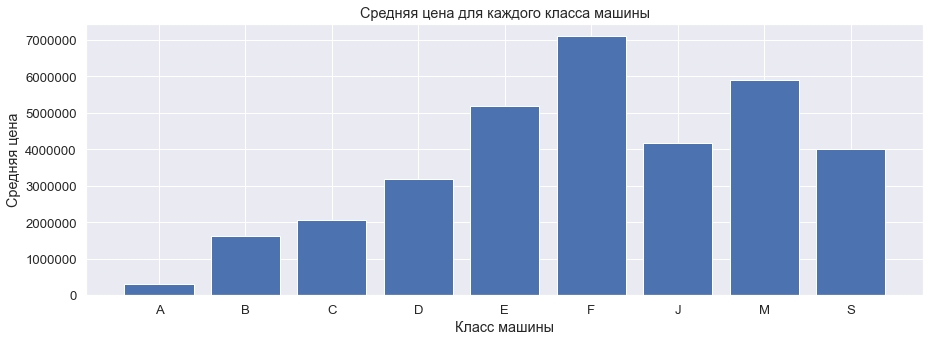

In [129]:
plt.figure(figsize=(15, 5))
plt.bar(df_class_price.index, df_class_price)
plt.xlabel('Класс машины')
plt.ylabel('Средняя цена')
plt.title('Средняя цена для каждого класса машины')
plt.ticklabel_format(style='plain', axis='y')  # Изменяем формат для оси Y
plt.show()

Одна из наших гипотез основана на местоположении предложения о покупке автомобиля, поэтому необходимо посчитать среднюю цену автомобилей по городам

In [131]:
df_city_price = df.groupby('Город')['Цена'].mean().astype(int)
df_city_price

Город
ekaterinburg       2579937
moskva             3496424
novosibirsk        3033032
rostov-na-donu     3576424
sankt-peterburg    3055966
vladivostok        2498482
Name: Цена, dtype: int64

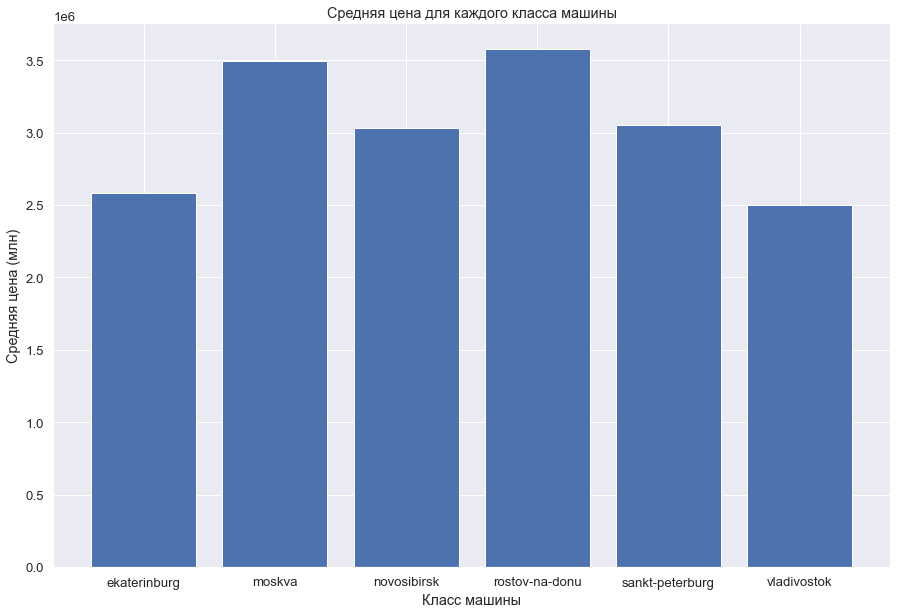

In [132]:
plt.figure(figsize=(15, 10))
plt.bar(df_city_price.index, df_city_price)
plt.xlabel('Класс машины')
plt.ylabel('Средняя цена (млн)')
plt.title('Средняя цена для каждого класса машины')
plt.show()

Для понимания структуры предложения автомобилей на китайском авто, необходимо понять, в каком процентном соотношении находятся электрические автомобили и остальные

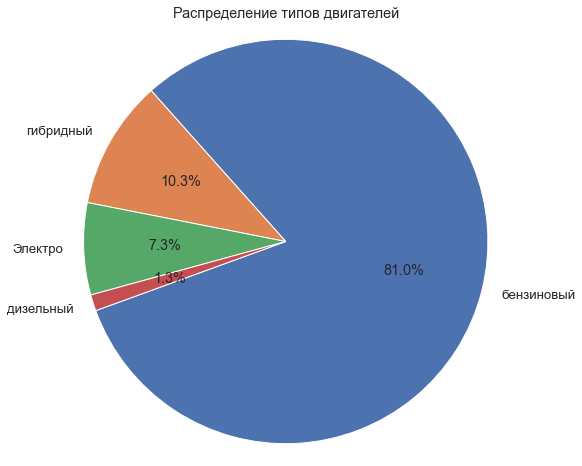

In [133]:
engine_types = df['Тип двигателя'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(engine_types, labels=engine_types.index, autopct='%1.1f%%', startangle=200)
plt.title('Распределение типов двигателей')
plt.axis('equal')
plt.show()

Также необходимо узнать, какие Китайские автомобили больше всего пользуются спросом на Российском рынке

In [134]:
car_model = df['Название'].value_counts()
car_model = car_model.head(5)
car_model

Geely Coolray        110
Haval Jolion         104
Chery Tiggo 7 Pro     87
Haval F7x             86
Geely Monjaro         77
Name: Название, dtype: int64

Для самых популярных автомобилей необходимо построить ящики с усами, чтобы понимать разброс цен на эти машины

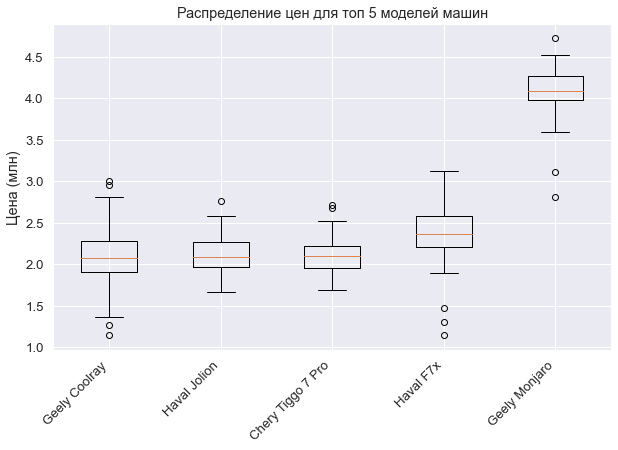

In [135]:
model_prices = []
for model, count in car_model.items():
    prices = df[df['Название'] == model]['Цена'] / 1_000_000
    model_prices.append(prices)
    
plt.figure(figsize=(10, 6))
plt.boxplot(model_prices, labels=car_model.index)
plt.xticks(range(1, len(car_model) + 1), car_model.index, rotation=45, ha='right')
plt.ylabel('Цена (млн)')
plt.title('Распределение цен для топ 5 моделей машин')
plt.show()